# Initialize Libs

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


# CONSTANTS

In [2]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/time/submission1/'

# Load Energy and Temp Dataset

In [3]:
temp_part_one = pd.read_csv(BASE_DIR + 'hr_temp_20170201-20200131_subset[1].csv') 
temp_part_two = pd.read_csv(BASE_DIR + 'hr_temp_20200201-20200229_subset[1].csv') 
meter_data = pd.read_csv(BASE_DIR + 'hrl_load_metered_-_20170201-20200131[1].csv') 



# Explore Data

In [4]:
print(temp_part_one.head())
print(temp_part_one.tail())
print (meter_data.head())
print (meter_data.tail())


       STATION                 DATE  ... SOURCE  HourlyDryBulbTemperature
0  72520514762  2017-02-01T00:53:00  ...      7                      37.0
1  72520514762  2017-02-01T01:53:00  ...      7                      37.0
2  72520514762  2017-02-01T02:53:00  ...      7                      36.0
3  72520514762  2017-02-01T03:53:00  ...      7                      36.0
4  72520514762  2017-02-01T04:53:00  ...      7                      36.0

[5 rows x 5 columns]
           STATION                 DATE  ... SOURCE  HourlyDryBulbTemperature
26275  72520514762  2020-01-31T19:53:00  ...      7                      34.0
26276  72520514762  2020-01-31T20:53:00  ...      7                      33.0
26277  72520514762  2020-01-31T21:53:00  ...      7                      33.0
26278  72520514762  2020-01-31T22:53:00  ...      7                      33.0
26279  72520514762  2020-01-31T23:53:00  ...      7                      34.0

[5 rows x 5 columns]
  datetime_beginning_utc datetime_beginning_

# CleanUp Data & Visualize Interpolation

                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2018-10-25 12:53:00   NaN  1569.389    12        3     10  2018
2018-12-25 02:53:00   NaN  1269.577     2        1     12  2018
2018-12-25 03:53:00   NaN  1263.540     3        1     12  2018
2018-12-25 04:53:00   NaN  1271.892     4        1     12  2018
2018-12-25 05:53:00   NaN  1304.021     5        1     12  2018


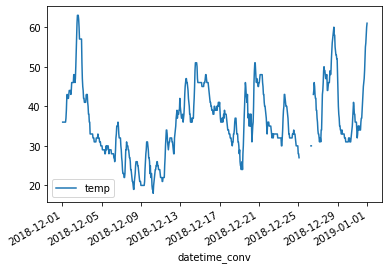

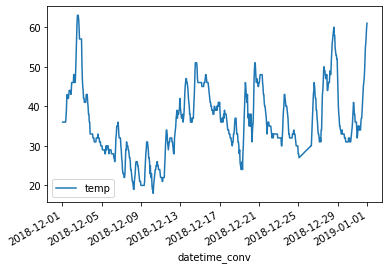

In [5]:
temp_part_one['datetime_conv'] = pd.to_datetime(temp_part_one['DATE']) 
temp_part_one = temp_part_one.rename(columns={'HourlyDryBulbTemperature':'temp'})
clean_temp = temp_part_one.drop(['DATE', 'REPORT_TYPE', 'SOURCE', 'STATION'], axis=1)
clean_temp = clean_temp.join(meter_data['mw'])
clean_temp['hour'] = clean_temp['datetime_conv'].map(lambda x: x.hour)
clean_temp['weekday'] = clean_temp['datetime_conv'].map(lambda x: x.dayofweek)
clean_temp['month'] = clean_temp['datetime_conv'].map(lambda x: x.month)
clean_temp['year'] = clean_temp['datetime_conv'].map(lambda x: x.year)
clean_temp = clean_temp.set_index('datetime_conv')

print(clean_temp[pd.isna(clean_temp['temp'])].head())

clean_temp[(clean_temp['year']==2018) & (clean_temp['month'] == 12)].plot(y='temp')
clean_temp = clean_temp.interpolate()
clean_temp[(clean_temp['year']==2018) & (clean_temp['month'] == 12)].plot(y='temp')


# Split Test and TrainData

In [6]:
DATA_SPLIT_DATE = '2020-01-01'

train_data = clean_temp[clean_temp.index < DATA_SPLIT_DATE]
test_data = clean_temp[clean_temp.index >= DATA_SPLIT_DATE]

print('TRAIN DATA')
print(train_data.head())
print(train_data.shape)

print('TEST DATA')
print(test_data.head())
print(test_data.shape)


TRAIN DATA
                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2017-02-01 00:53:00  37.0  1419.881     0        2      2  2017
2017-02-01 01:53:00  37.0  1379.505     1        2      2  2017
2017-02-01 02:53:00  36.0  1366.106     2        2      2  2017
2017-02-01 03:53:00  36.0  1364.453     3        2      2  2017
2017-02-01 04:53:00  36.0  1391.265     4        2      2  2017
(25536, 6)
TEST DATA
                     temp        mw  hour  weekday  month  year
datetime_conv                                                  
2020-01-01 00:53:00  31.0  1363.428     0        2      1  2020
2020-01-01 01:53:00  29.0  1335.975     1        2      1  2020
2020-01-01 02:53:00  30.0  1296.817     2        2      1  2020
2020-01-01 03:53:00  30.0  1288.403     3        2      1  2020
2020-01-01 04:53:00  31.0  1292.263     4        2      1  2020
(744, 6)


# Explore in More Detail Energy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


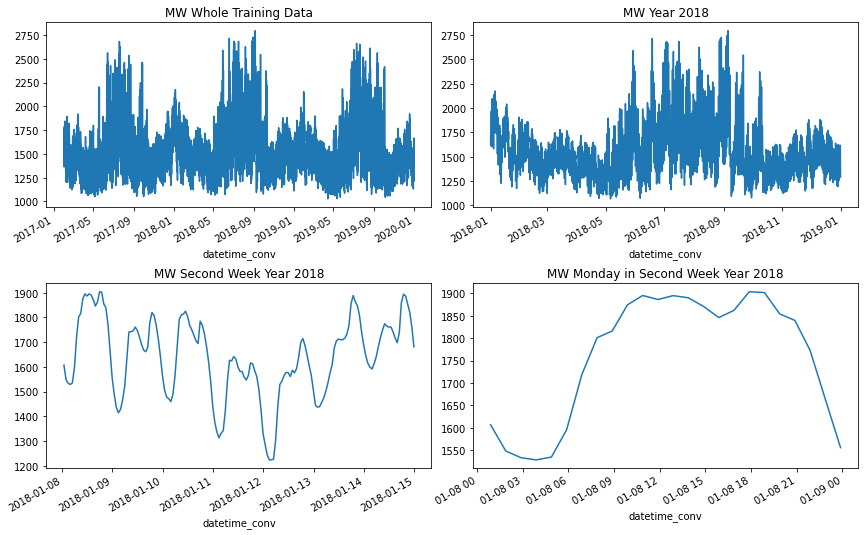

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
fig.tight_layout(h_pad=7 )

train_data["mw"].plot(ax=axes[0, 0]);
axes[0, 0].set_title("MW Whole Training Data");

train_data[train_data['year'] ==2018]["mw"].plot(ax=axes[0, 1]);
axes[0, 1].set_title("MW Year 2018");


train_data[(train_data.index.week ==2) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[1, 0]);
axes[1, 0].set_title("MW Second Week Year 2018");

train_data[(train_data['weekday'] == 0) & (train_data.index.week ==2) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[1, 1]);
axes[1, 1].set_title("MW Monday in Second Week Year 2018");



# Explore in More Detail Temperature

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  app.launch_new_instance()


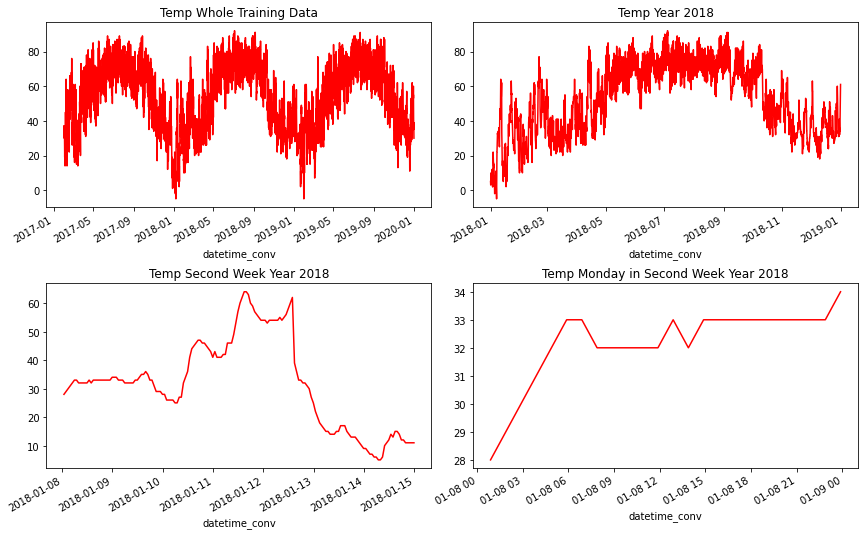

In [8]:


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
fig.tight_layout(h_pad=7 )

train_data["temp"].plot(ax=axes[0, 0], color="r");
axes[0, 0].set_title("Temp Whole Training Data");

train_data[train_data['year'] ==2018]["temp"].plot(ax=axes[0, 1], color="r");
axes[0, 1].set_title("Temp Year 2018");


train_data[(train_data.index.week ==2) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[1, 0], color="r");
axes[1, 0].set_title("Temp Second Week Year 2018");

train_data[(train_data['weekday'] == 0) & (train_data.index.week ==2) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[1, 1], color="r");
axes[1, 1].set_title("Temp Monday in Second Week Year 2018");


# Combine Plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar(

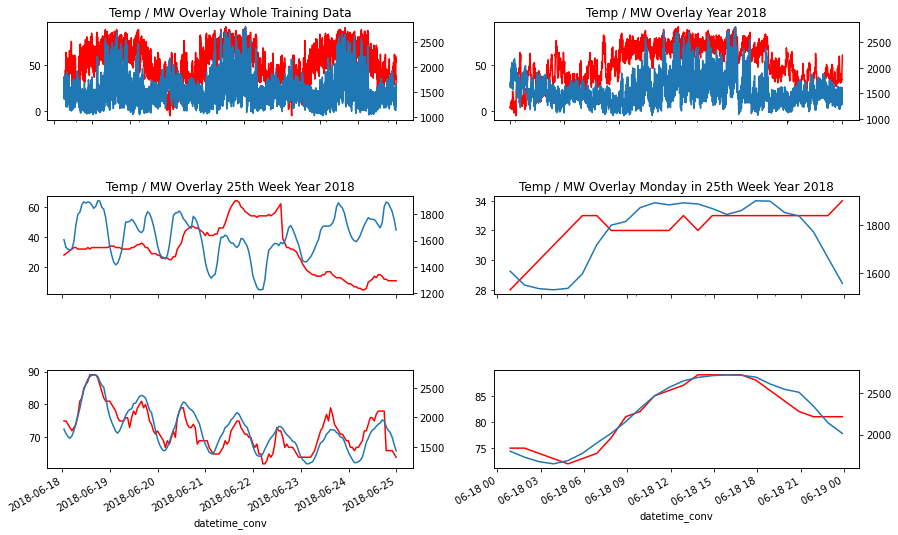

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,8))
fig.tight_layout(h_pad=7 , w_pad=5)

train_data["temp"].plot(ax=axes[0, 0], color="r");
train_data["mw"].plot(ax=axes[0, 0], secondary_y=True);
axes[0, 0].set_title("Temp / MW Overlay Whole Training Data");

train_data[train_data['year'] ==2018]["temp"].plot(ax=axes[0, 1], color="r");
train_data[train_data['year'] ==2018]["mw"].plot(ax=axes[0, 1], secondary_y=True);
axes[0, 1].set_title("Temp / MW Overlay Year 2018");


train_data[(train_data.index.week ==2) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[1, 0], color="r");
train_data[(train_data.index.week ==2) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[1, 0], secondary_y=True);
axes[1, 0].set_title("Temp / MW Overlay Second Week Year 2018");

train_data[(train_data['weekday'] == 0) & (train_data.index.week ==2) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[1, 1], color="r");
train_data[(train_data['weekday'] == 0) & (train_data.index.week ==2) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[1, 1], secondary_y=True);
axes[1, 1].set_title("Temp / MW Overlay Monday in Second Week Year 2018");



train_data[(train_data.index.week ==25) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[2, 0], color="r");
train_data[(train_data.index.week ==25) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[2, 0], secondary_y=True);
axes[1, 0].set_title("Temp / MW Overlay 25th Week Year 2018");

train_data[(train_data['weekday'] == 0) & (train_data.index.week ==25) & (train_data['year'] ==2018)]["temp"].plot(ax=axes[2, 1], color="r");
train_data[(train_data['weekday'] == 0) & (train_data.index.week ==25) & (train_data['year'] ==2018)]["mw"].plot(ax=axes[2, 1], secondary_y=True);
axes[1, 1].set_title("Temp / MW Overlay Monday in 25th Week Year 2018");

# Possible Correlation

Text(0.5, 1.0, 'Correlation')

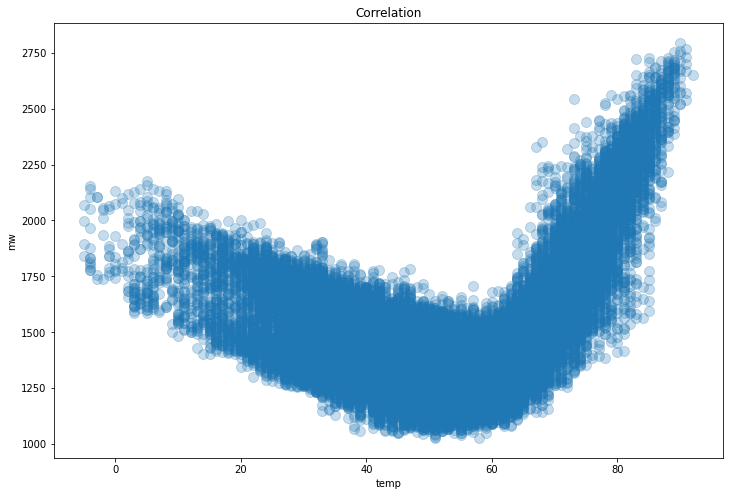

In [10]:
train_data.plot.scatter(x='temp', y='mw', alpha=.25, s=100, figsize=(12,8))
plt.title("Correlation")

# Correlation Only For July an January

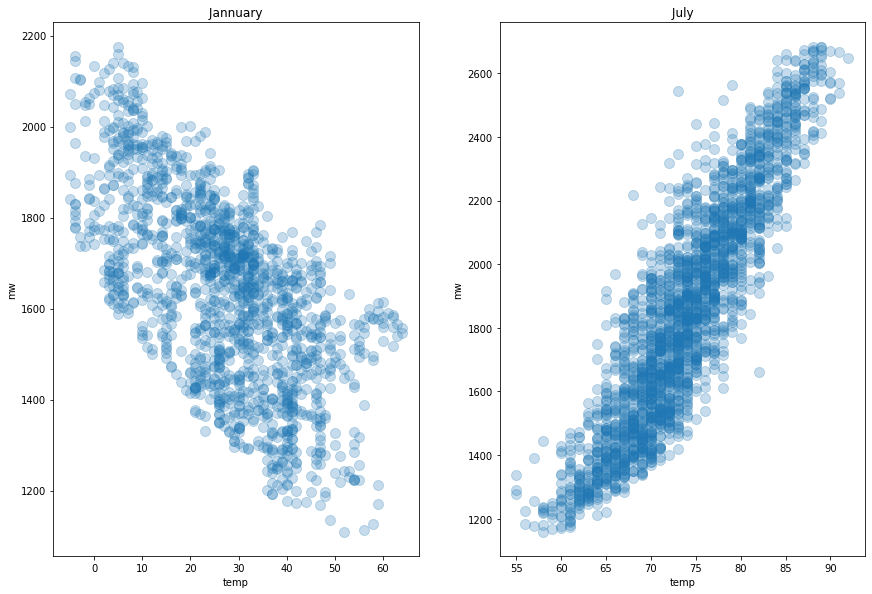

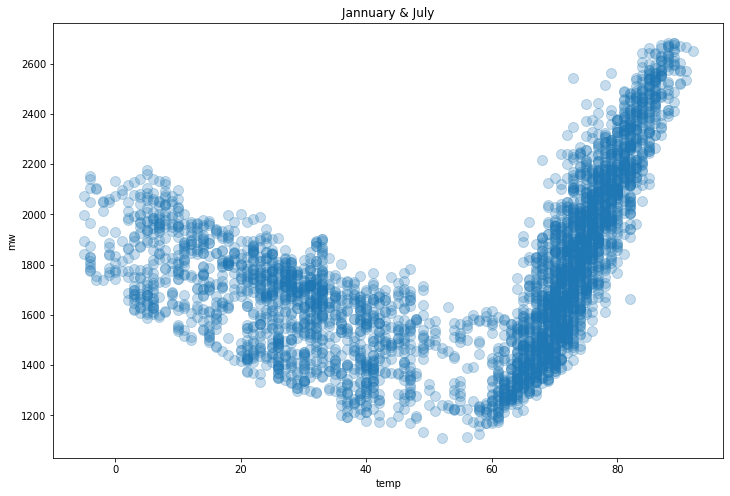

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))

fig.tight_layout(h_pad=7 , w_pad=5)

train_data[train_data['month'] ==1 ].plot.scatter(ax=axes[0], x='temp', y='mw', alpha=.25, s=100 )
axes[0].set_title(" Jannuary ");

train_data[train_data['month'] ==7 ].plot.scatter(ax=axes[ 1], x='temp', y='mw', alpha=.25, s=100 )
axes[1].set_title(" July ");


train_data[(train_data['month'] ==7) | (train_data['month'] ==1)].plot.scatter(x='temp', y='mw', alpha=.25, s=100, figsize=(12,8))
plt.title(" Jannuary & July ");




# Correlation MidNight and Noon

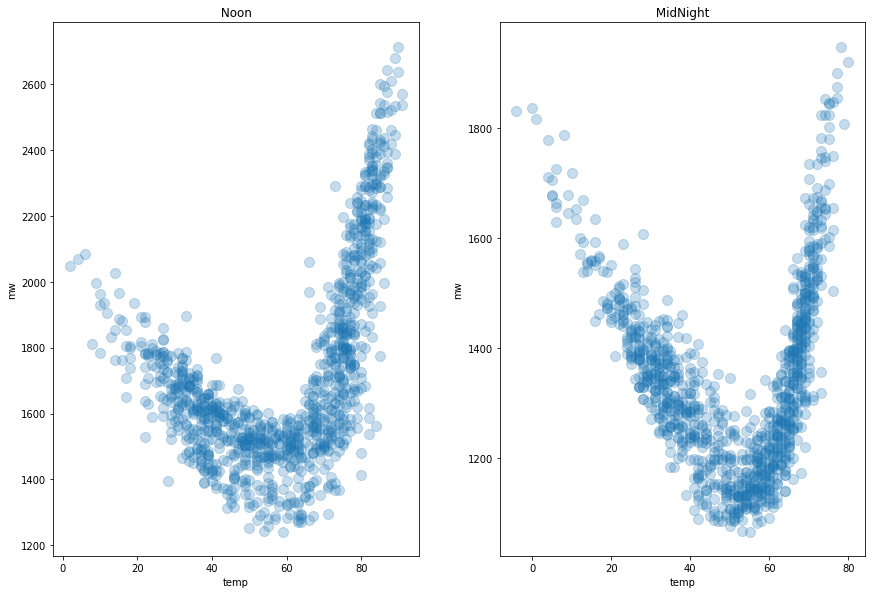

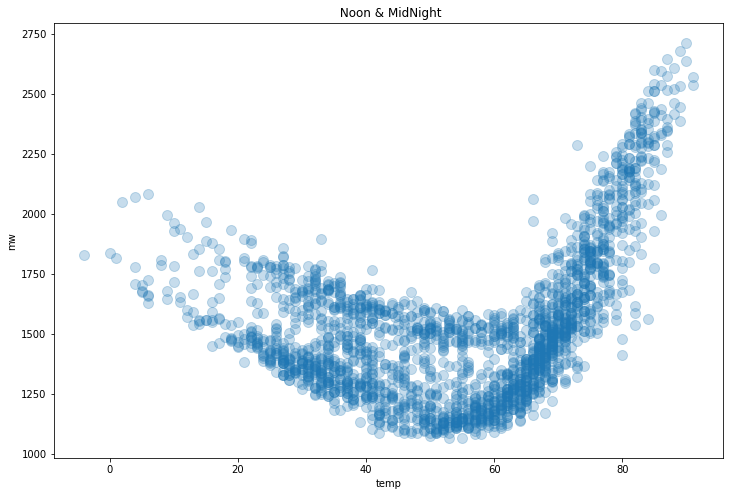

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))

fig.tight_layout(h_pad=7 , w_pad=5)

train_data[train_data['hour'] ==12 ].plot.scatter(ax=axes[0], x='temp', y='mw', alpha=.25, s=100 )
axes[0].set_title(" Noon ");

train_data[train_data['hour'] ==0 ].plot.scatter(ax=axes[ 1], x='temp', y='mw', alpha=.25, s=100 )
axes[1].set_title(" MidNight ");


train_data[(train_data['hour'] ==12) | (train_data['hour'] ==0)].plot.scatter(x='temp', y='mw', alpha=.25, s=100, figsize=(12,8))
plt.title(" Noon & MidNight");

# Normalize Temp data

In [16]:
train_data['n_temp'] = (train_data['temp'] - train_data['temp'].mean())/train_data['temp'].std()
train_data.head(20)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,temp,mw,hour,weekday,month,year,n_temp
datetime_conv,,,,,,,
2017-02-01 00:53:00,37.0,1419.881,0,2,2,2017,-0.871499
2017-02-01 01:53:00,37.0,1379.505,1,2,2,2017,-0.871499
2017-02-01 02:53:00,36.0,1366.106,2,2,2,2017,-0.924494
2017-02-01 03:53:00,36.0,1364.453,3,2,2,2017,-0.924494
2017-02-01 04:53:00,36.0,1391.265,4,2,2,2017,-0.924494
2017-02-01 05:53:00,36.0,1477.343,5,2,2,2017,-0.924494
2017-02-01 06:53:00,34.0,1585.252,6,2,2,2017,-1.030485
2017-02-01 07:53:00,33.0,1671.412,7,2,2,2017,-1.083481
2017-02-01 08:53:00,34.0,1708.597,8,2,2,2017,-1.030485
